In [1]:
import pandas as pd
import json, csv, sys, os
import seaborn as sns
import matplotlib.pyplot as plt

### First, rank by accuracy and save rankings.

In [9]:
metrics = pd.read_csv('../metrics/ranked_by_accuracy.csv')

In [10]:
metrics_list = metrics['Model'].tolist()
print(len(metrics))

499


In [11]:
acc_rank = metrics['Model'].tolist()
print(sorted(acc_rank))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [7]:
print(len(acc_rank))

499


In [17]:
path = 'LOFO_rankings.json'

acc_ranks = {}

for index, ranking in enumerate(accuracy_rankings, start=1):
    acc_ranks[index] = ranking

with open(path, 'w') as json_file:
    json.dump(acc_ranks, json_file, indent=4)

print(f"Saved to '{path}'")

Saved to 'LOFO_rankings.json'


In [18]:
print(acc_ranks)

{1: 35, 2: 95, 3: 351, 4: 453, 5: 458, 6: 10, 7: 93, 8: 492, 9: 97, 10: 60, 11: 404, 12: 66, 13: 67, 14: 498, 15: 101, 16: 96, 17: 92, 18: 88, 19: 36, 20: 68, 21: 499, 22: 99, 23: 460, 24: 489, 25: 493, 26: 77, 27: 495, 28: 65, 29: 64, 30: 31, 31: 32, 32: 455, 33: 456, 34: 85, 35: 87, 36: 451, 37: 135, 38: 55, 39: 59, 40: 231, 41: 4, 42: 71, 43: 78, 44: 452, 45: 94, 46: 76, 47: 75, 48: 126, 49: 401, 50: 414, 51: 413, 52: 102, 53: 405, 54: 98, 55: 412, 56: 415, 57: 147, 58: 13, 59: 385, 60: 410, 61: 104, 62: 420, 63: 74, 64: 122, 65: 100, 66: 497, 67: 180, 68: 133, 69: 144, 70: 112, 71: 120, 72: 89, 73: 136, 74: 131, 75: 163, 76: 110, 77: 237, 78: 396, 79: 399, 80: 73, 81: 454, 82: 457, 83: 469, 84: 289, 85: 470, 86: 236, 87: 228, 88: 491, 89: 70, 90: 494, 91: 114, 92: 409, 93: 487, 94: 121, 95: 418, 96: 124, 97: 449, 98: 422, 99: 119, 100: 210, 101: 408, 102: 394, 103: 389, 104: 375, 105: 326, 106: 298, 107: 281, 108: 262, 109: 241, 110: 140, 111: 219, 112: 184, 113: 192, 114: 411, 115

In [19]:
csv_path = '../metrics/ranked_by_accuracy.csv'
json_path = '../LOFO_ranks.json'
output_path = '../metrics/decoded_ranked_by_accuracy.csv'

models = []
accuracies = []

with open(csv_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader) 
    for row in csvreader:
        models.append(row[0])
        accuracies.append(row[1])

with open(json_path, 'r') as jsonfile:
    model_names_dict = json.load(jsonfile)
model_names = list(model_names_dict.values())

with open(output_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Model', 'Accuracy'])
    for model, accuracy in zip(model_names, accuracies):
        csvwriter.writerow([model, accuracy])

print(f"CSV created at {output_path}")

CSV created at ../metrics/decoded_ranked_by_accuracy.csv


### Now, plot the Top 25 accuracy rankings.

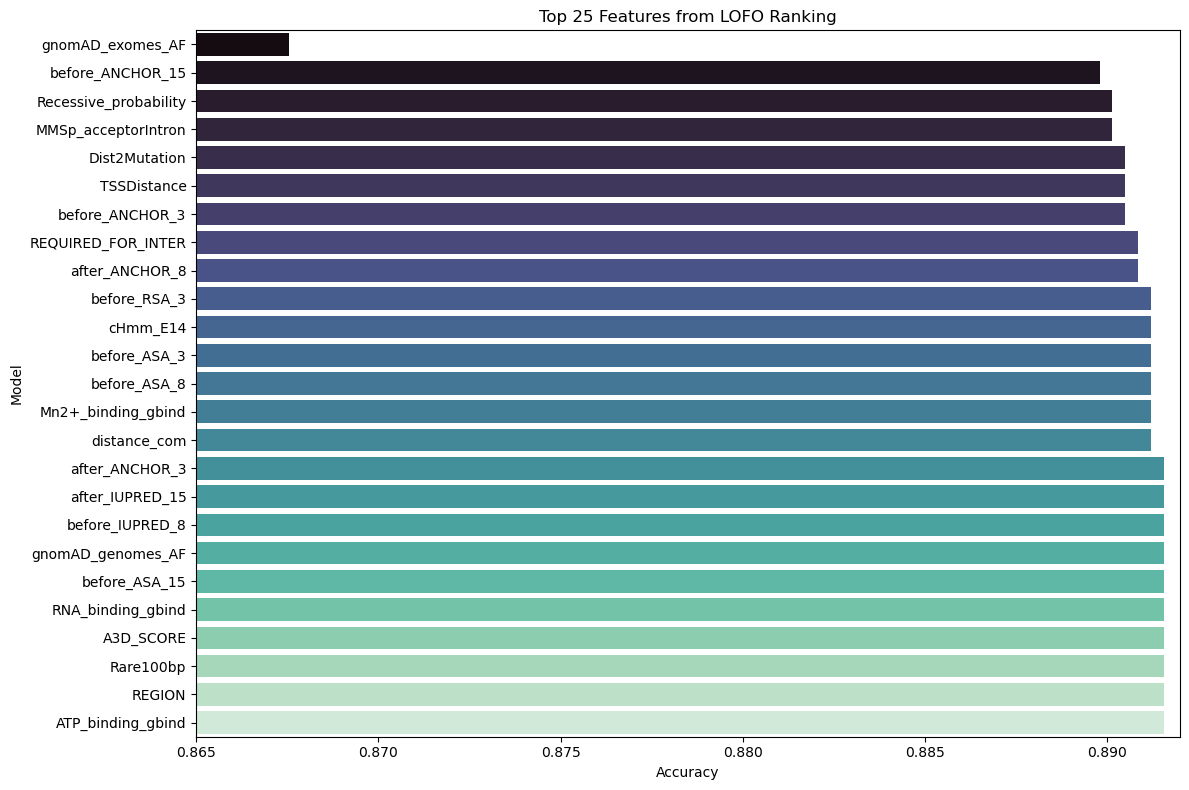

In [8]:
# Load CSV.
df = pd.read_csv('../metrics/decoded_ranked_by_accuracy.csv')

# Filter for Top 25.
top25 = df.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy', y='Model', data=top25, hue='Model', palette='mako', legend=False)

# Zoom in.
plt.xlim(0.865, 0.892)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Top 25 Features from LOFO Ranking')
plt.tight_layout()
plt.show()